In [2]:
import pandas as pd

In [4]:
df_posts = pd.read_csv("D:\SOPosts_combined.csv")

df_posts=df_posts.sample(frac=1).reset_index(drop=True)
df_posts.head()

,Id,Title,Body,Tags
0,27326345,Entity Framework/LINQ - Returning data transfe...,<p>I am using WebAPI and Entity Framework to b...,<c#><linq><entity-framework><factory><dto>
1,16606045,Common Image format for all android camera Phones,<p>I am using a customized Camera in my applic...,<android><android-camera>
2,23276,What happens to the people inside when the TAR...,<p>If the TARDIS is turned upside down or is l...,<doctor-who><tardis>
3,54614,"Shouldn't Ozai have remained ""Fire Lord""?","<p>After having been defeated and <a href=""htt...",<avatar-the-last-airbender><the-legend-of-korra>
4,38338948,How do I get _all_ the NSURLRequest data?,"<p>I'm going to be using a different protocol,...",<ios><swift><osx><nsdata><nsurlrequest>


In [5]:
len(df_posts[df_posts['Tags'].isnull()])

df_posts.drop(df_posts[df_posts['Tags'].isnull()].index, inplace=True)

len(df_posts[df_posts['Tags'].isnull()])

0

In [3]:
df_posts.shape


(99608, 4)

In [6]:
from bs4 import BeautifulSoup, Tag

def clean_html(text):
    soup = BeautifulSoup(text, "lxml")
    for tag in soup.find_all('code'):
        tag.decompose()
    return soup.get_text() 

In [7]:
df_posts['Body'] = df_posts['Body'].apply(clean_html)

In [8]:
df_posts['Body'] =df_posts['Body'].str.replace("\n","")

In [9]:
df_posts.head()

,Id,Title,Body,Tags
0,27326345,Entity Framework/LINQ - Returning data transfe...,I am using WebAPI and Entity Framework to buil...,<c#><linq><entity-framework><factory><dto>
1,16606045,Common Image format for all android camera Phones,I am using a customized Camera in my applicati...,<android><android-camera>
2,23276,What happens to the people inside when the TAR...,If the TARDIS is turned upside down or is laid...,<doctor-who><tardis>
3,54614,"Shouldn't Ozai have remained ""Fire Lord""?",After having been defeated and de-bended by Av...,<avatar-the-last-airbender><the-legend-of-korra>
4,38338948,How do I get _all_ the NSURLRequest data?,"I'm going to be using a different protocol, so...",<ios><swift><osx><nsdata><nsurlrequest>


In [10]:
df_posts['Full_Text'] = df_posts['Title'] + df_posts['Body']

In [11]:
df_posts.head()

,Id,Title,Body,Tags,Full_Text
0,27326345,Entity Framework/LINQ - Returning data transfe...,I am using WebAPI and Entity Framework to buil...,<c#><linq><entity-framework><factory><dto>,Entity Framework/LINQ - Returning data transfe...
1,16606045,Common Image format for all android camera Phones,I am using a customized Camera in my applicati...,<android><android-camera>,Common Image format for all android camera Pho...
2,23276,What happens to the people inside when the TAR...,If the TARDIS is turned upside down or is laid...,<doctor-who><tardis>,What happens to the people inside when the TAR...
3,54614,"Shouldn't Ozai have remained ""Fire Lord""?",After having been defeated and de-bended by Av...,<avatar-the-last-airbender><the-legend-of-korra>,"Shouldn't Ozai have remained ""Fire Lord""?After..."
4,38338948,How do I get _all_ the NSURLRequest data?,"I'm going to be using a different protocol, so...",<ios><swift><osx><nsdata><nsurlrequest>,How do I get _all_ the NSURLRequest data?I'm g...


In [12]:
import re

def tag_split(text):
    return re.findall(r"\<(.*?)\>",text)


In [13]:
df_posts['split_tags'] = df_posts['Tags'].apply(tag_split)

In [14]:
df_posts.head()

,Id,Title,Body,Tags,Full_Text,split_tags
0,27326345,Entity Framework/LINQ - Returning data transfe...,I am using WebAPI and Entity Framework to buil...,<c#><linq><entity-framework><factory><dto>,Entity Framework/LINQ - Returning data transfe...,"[c#, linq, entity-framework, factory, dto]"
1,16606045,Common Image format for all android camera Phones,I am using a customized Camera in my applicati...,<android><android-camera>,Common Image format for all android camera Pho...,"[android, android-camera]"
2,23276,What happens to the people inside when the TAR...,If the TARDIS is turned upside down or is laid...,<doctor-who><tardis>,What happens to the people inside when the TAR...,"[doctor-who, tardis]"
3,54614,"Shouldn't Ozai have remained ""Fire Lord""?",After having been defeated and de-bended by Av...,<avatar-the-last-airbender><the-legend-of-korra>,"Shouldn't Ozai have remained ""Fire Lord""?After...","[avatar-the-last-airbender, the-legend-of-korra]"
4,38338948,How do I get _all_ the NSURLRequest data?,"I'm going to be using a different protocol, so...",<ios><swift><osx><nsdata><nsurlrequest>,How do I get _all_ the NSURLRequest data?I'm g...,"[ios, swift, osx, nsdata, nsurlrequest]"


In [18]:
df_posts1 = df_posts[['Id','Full_Text','split_tags']]
df_posts1 = df_posts1.sample(frac=1).reset_index(drop=True)

In [19]:
df_posts1.head()

,Id,Full_Text,split_tags
0,14356,"Which parts are from Eminems real life?In ""8 M...","[biopic, 8-mile]"
1,406,Why did people look at each others hands in Th...,"[movie, book-of-eli]"
2,2738359,Looped jQuery slideshow with smooth cross-fade...,"[javascript, jquery, animation, slideshow]"
3,8321321,Window hook is not working in Windows 7 but in...,"[windows, windows-7, mfc, hook]"
4,21985502,Why matlab neural network classification retur...,"[matlab, matrix, neural-network, classificatio..."


In [20]:
rows = []
_ = df_posts1.apply(lambda row: [rows.append([row['Id'], row['Full_Text'], stags]) 
                         for stags in row['split_tags']], axis=1)
df_posts2 = pd.DataFrame(rows, columns=df_posts1.columns)

In [21]:
df_posts2.head()

,Id,Full_Text,split_tags
0,14356,"Which parts are from Eminems real life?In ""8 M...",biopic
1,14356,"Which parts are from Eminems real life?In ""8 M...",8-mile
2,406,Why did people look at each others hands in Th...,movie
3,406,Why did people look at each others hands in Th...,book-of-eli
4,2738359,Looped jQuery slideshow with smooth cross-fade...,javascript


In [22]:
df_posts3 = df_posts2.drop('Id', axis=1)
df_posts3.head(10)

,Full_Text,split_tags
0,"Which parts are from Eminems real life?In ""8 M...",biopic
1,"Which parts are from Eminems real life?In ""8 M...",8-mile
2,Why did people look at each others hands in Th...,movie
3,Why did people look at each others hands in Th...,book-of-eli
4,Looped jQuery slideshow with smooth cross-fade...,javascript
5,Looped jQuery slideshow with smooth cross-fade...,jquery
6,Looped jQuery slideshow with smooth cross-fade...,animation
7,Looped jQuery slideshow with smooth cross-fade...,slideshow
8,Window hook is not working in Windows 7 but in...,windows
9,Window hook is not working in Windows 7 but in...,windows-7


In [24]:
df_tag_plot = df_posts2.groupby('split_tags',as_index=False).agg({'Id':'count', 'Id':lambda x: x.nunique()}).rename(columns={'Id':'total'}).nlargest(20,'total')
df_tag_plot.reset_index(inplace=True)
del df_tag_plot['index']
df_tag_plot.drop_duplicates(inplace=True)
df_tag_plot

,split_tags,total
0,javascript,4723
1,java,4567
2,c#,4121
3,plot-explanation,3867
4,php,3671
5,android,3344
6,jquery,2875
7,python,2597
8,html,2247
9,story-identification,2197


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

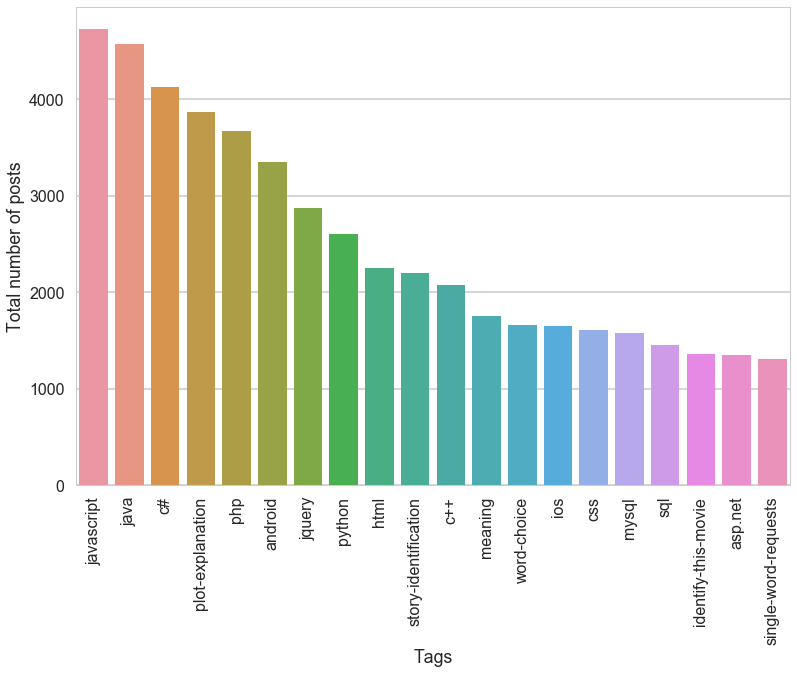

In [26]:
%matplotlib inline
df_tag_plot.reset_index(inplace=True)
sns.set(style = 'whitegrid')
sns.set_context("poster")
ax = sns.barplot( x = 'split_tags', y = 'total', data = df_tag_plot)
ax.set_xticklabels(rotation=90,labels=df_tag_plot['split_tags'])
ax.set(xlabel='Tags', ylabel='Total number of posts')

In [27]:
sq_df = pd.DataFrame(index=df_tag_plot['split_tags'].tolist(),columns=df_tag_plot['split_tags'].tolist()).fillna(0)


In [28]:
sq_df.head(10)

,javascript,java,c#,plot-explanation,php,android,jquery,python,html,story-identification,c++,meaning,word-choice,ios,css,mysql,sql,identify-this-movie,asp.net,single-word-requests
javascript,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
java,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c#,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
plot-explanation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
php,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
android,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
jquery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
python,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
html,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
story-identification,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
sq_df.shape

df_posts1.head()
df_posts_string=df_posts1['split_tags'].apply(lambda x: ', '.join(x))
df_posts_converted = pd.DataFrame(df_posts_string, columns=['split_tags'])
x=df_posts_converted[df_posts_converted['split_tags'].str.contains("java")  & df_posts_converted['split_tags'].str.contains("php")]
x

,split_tags
706,"javascript, php, html"
987,"php, javascript, html5, wkhtmltopdf"
1143,"javascript, php, angularjs"
1984,"javascript, php, html, forms, variables"
2286,"php, javascript, jquery, image, png"
3334,"javascript, php, jquery, html, twitter-bootstrap"
3561,"javascript, php, jquery, ajax"
3738,"php, javascript, compression"
4018,"javascript, php, yii, yii2, dropdown"
4036,"javascript, php, jquery, mysql, ajax"


In [31]:
import numpy as np

for index_i, row_i in df_tag_plot.iterrows():
    for index_j, row_j in df_tag_plot.iterrows():
        if np.all(sq_df.loc[row_j['split_tags']][row_i['split_tags']] > 0) :
            sq_df.loc[row_i['split_tags']][row_j['split_tags']] = sq_df.loc[row_j['split_tags']][row_i['split_tags']]
        elif row_i['split_tags']!= row_j['split_tags']:
            #df_filtered = df_posts_converted[df_posts_converted['split_tags'].str.contains(row_i['split_tags']) & df_posts_converted['split_tags'].str.contains(row_j['split_tags'])]
            if row_i['split_tags'] == "c++":
                df_filtered = df_posts_converted[df_posts_converted['split_tags'].str.contains("c") & df_posts_converted['split_tags'].str.contains(row_j['split_tags'])]
            elif row_j['split_tags'] == "c++":
                df_filtered = df_posts_converted[df_posts_converted['split_tags'].str.contains(row_i['split_tags']) & df_posts_converted['split_tags'].str.contains("c")]
            else:
                df_filtered = df_posts_converted[df_posts_converted['split_tags'].str.contains(row_i['split_tags']) & df_posts_converted['split_tags'].str.contains(row_j['split_tags'])]
            for index_k, row_k in df_filtered.iterrows():
                if row_i['split_tags'] in row_k['split_tags'] and row_j['split_tags'] in row_k['split_tags']:
                    sq_df.loc[row_i['split_tags']][row_j['split_tags']] += 1
                

In [32]:
sq_df.head()

,javascript,java,c#,plot-explanation,php,android,jquery,python,html,story-identification,c++,meaning,word-choice,ios,css,mysql,sql,identify-this-movie,asp.net,single-word-requests
javascript,0,4749,73,0,290,44,1528,28,1050,0,5,0,0,28,436,39,56,0,175,0
java,4749,0,104,0,314,646,1542,47,1090,0,23,0,0,33,445,116,225,0,177,0
c#,73,104,0,0,7,27,52,9,68,0,39,0,0,9,7,30,291,0,762,0
plot-explanation,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
php,290,314,7,0,0,31,262,11,302,0,0,0,0,12,46,680,773,0,2,0


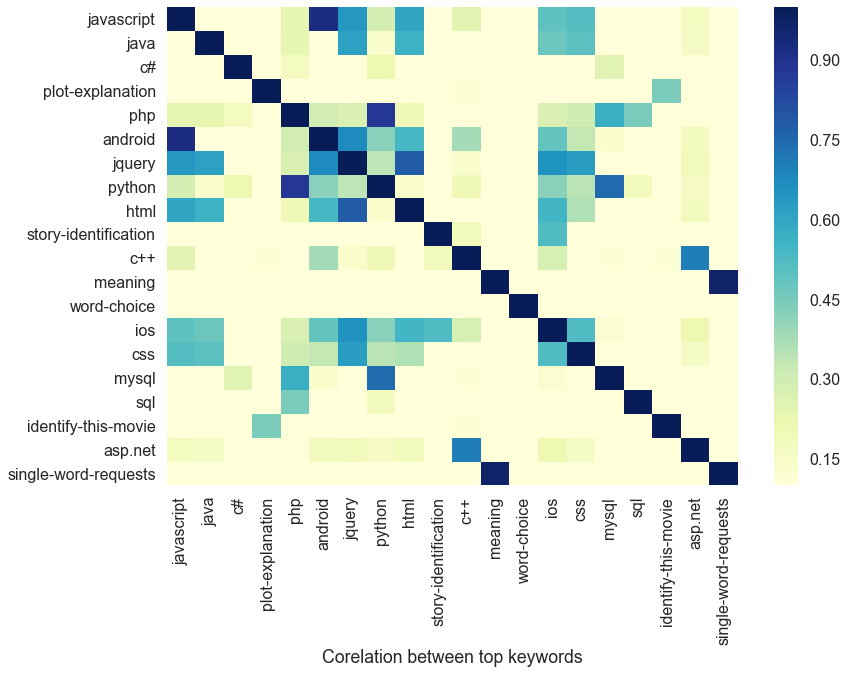

In [38]:
sns.set()
sns.set_context("poster")
corr = sq_df.corr()
ax = sns.heatmap(corr, cmap="YlGnBu", vmin=0.1, vmax=1)
ax.set(xlabel='Corelation between top keywords')

In [ ]:
df_posts1.head()

In [39]:
def getlen(taglist):
    return len(taglist)


df_tags = df_posts1
df_tags['tag_length']=df_posts1['split_tags'].apply(getlen)
df_tags.head()

,Id,Full_Text,split_tags,tag_length
0,14356,"Which parts are from Eminems real life?In ""8 M...","[biopic, 8-mile]",2
1,406,Why did people look at each others hands in Th...,"[movie, book-of-eli]",2
2,2738359,Looped jQuery slideshow with smooth cross-fade...,"[javascript, jquery, animation, slideshow]",4
3,8321321,Window hook is not working in Windows 7 but in...,"[windows, windows-7, mfc, hook]",4
4,21985502,Why matlab neural network classification retur...,"[matlab, matrix, neural-network, classificatio...",5


In [40]:
df_tags
df_tag_agg = df_tags.groupby('tag_length',as_index=False).agg({'Id':'count'}).rename(columns={'Id':'total_posts'})
df_tag_agg


,tag_length,total_posts
0,1,5783
1,2,45242
2,3,31844
3,4,10272
4,5,6388


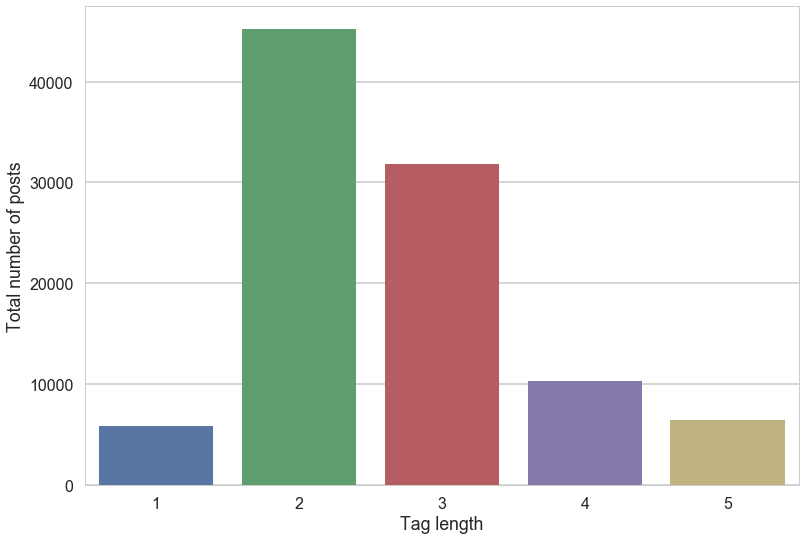

In [41]:
df_tag_agg.reset_index(inplace=True)
sns.set(style = 'whitegrid')
sns.set_context("poster")
ax = sns.barplot( x = 'tag_length', y = 'total_posts', data = df_tag_agg)
ax.set(xlabel='Tag length', ylabel='Total number of posts')

In [28]:
df_2tags = df_tags[df_tags['tag_length']==2]
df_2tags.drop('tag_length',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
df_2tags.head()

,Id,Full_Text,split_tags
0,21435,Identify short story where two humans to save...,"[story-identification, short-stories]"
4,19221127,Drag object is behind containerI have 2 contai...,"[flex, actionscript]"
5,42104,Theory of supercategoriesCategory Theory has e...,"[computer-science, category-theory]"
6,33010,Why was Turing told that his fiance was in jai...,"[plot-explanation, the-imitation-game]"
7,21690,Can I make my own malt?The malt that I found i...,"[bread, malt]"
